In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:
df_disciplinary = pd.read_csv('archive/disciplinary.csv')
df_goals = pd.read_csv('archive/goals.csv')
fixtures_df = pd.read_csv('archive/fixtures.csv')


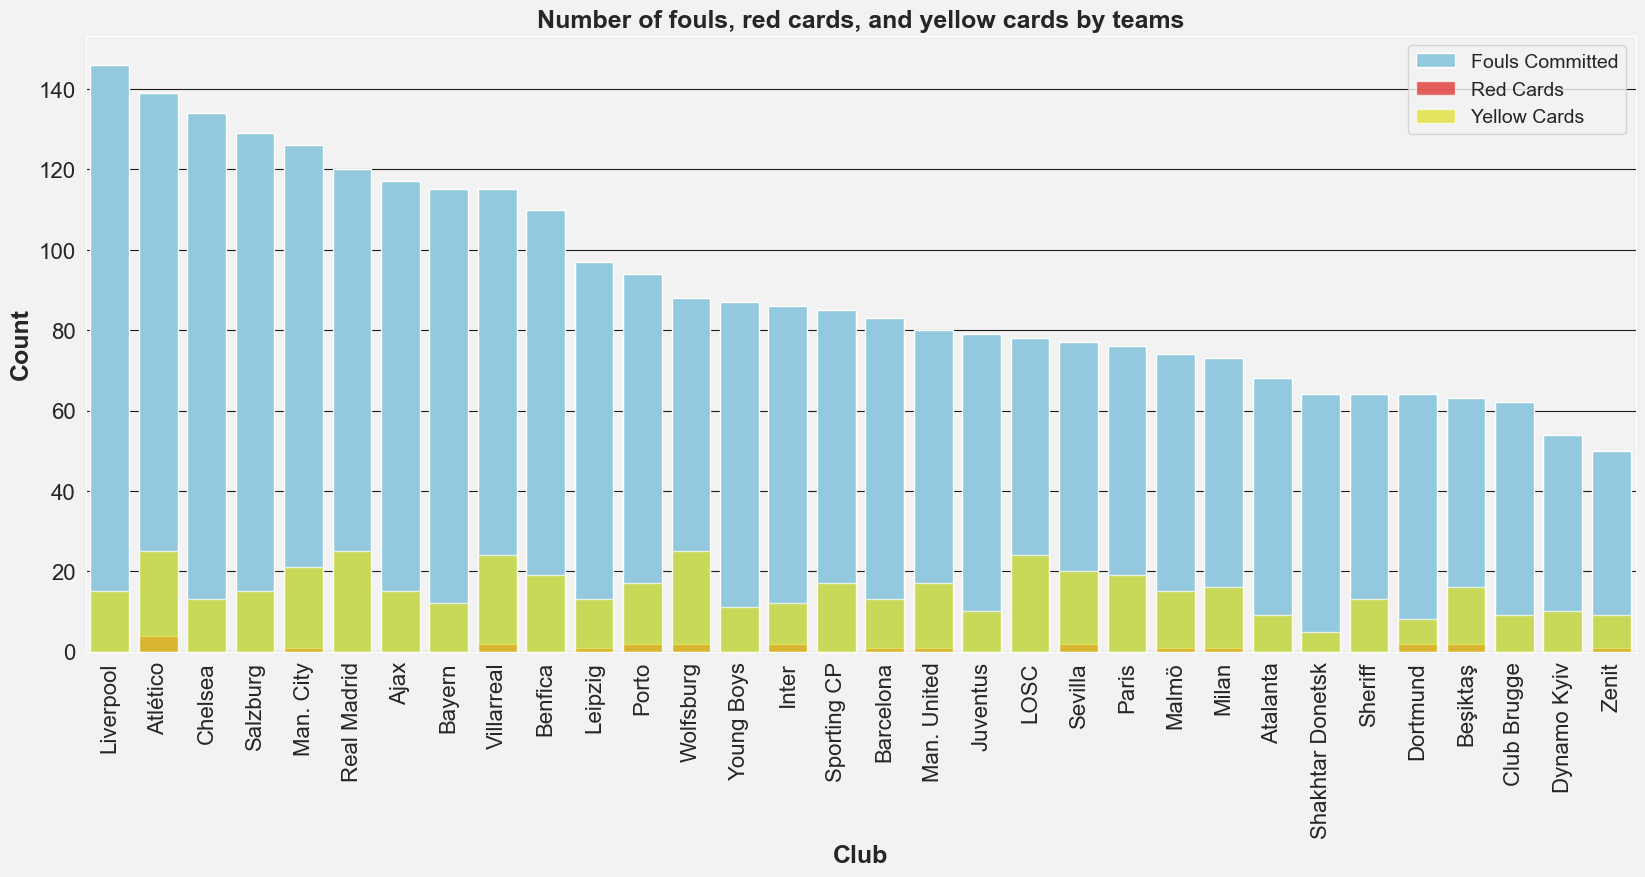

In [30]:
plt.figure(figsize=(20, 8))
plt.title('Number of fouls, red cards, and yellow cards by teams', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})

# Grouping the data
grouped_data = df_disciplinary.groupby('club').sum()

# Sorting the values by fouls committed in descending order
sorted_data = grouped_data['fouls_committed'].sort_values(ascending=False)

# Plotting fouls committed
sns.barplot(x=sorted_data.index, y=sorted_data.values, color='skyblue', label='Fouls Committed')

# Plotting yellow cards (flipped with red cards)
sns.barplot(x=sorted_data.index, y=grouped_data.loc[sorted_data.index, 'yellow'], color='red', alpha=0.7, label='Red Cards')

# Plotting red cards (flipped with yellow cards)
sns.barplot(x=sorted_data.index, y=grouped_data.loc[sorted_data.index, 'red'], color='yellow', alpha=0.7, label='Yellow Cards')

plt.xlabel('Club', fontsize=18, fontweight='bold')
plt.ylabel('Count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)

plt.show()


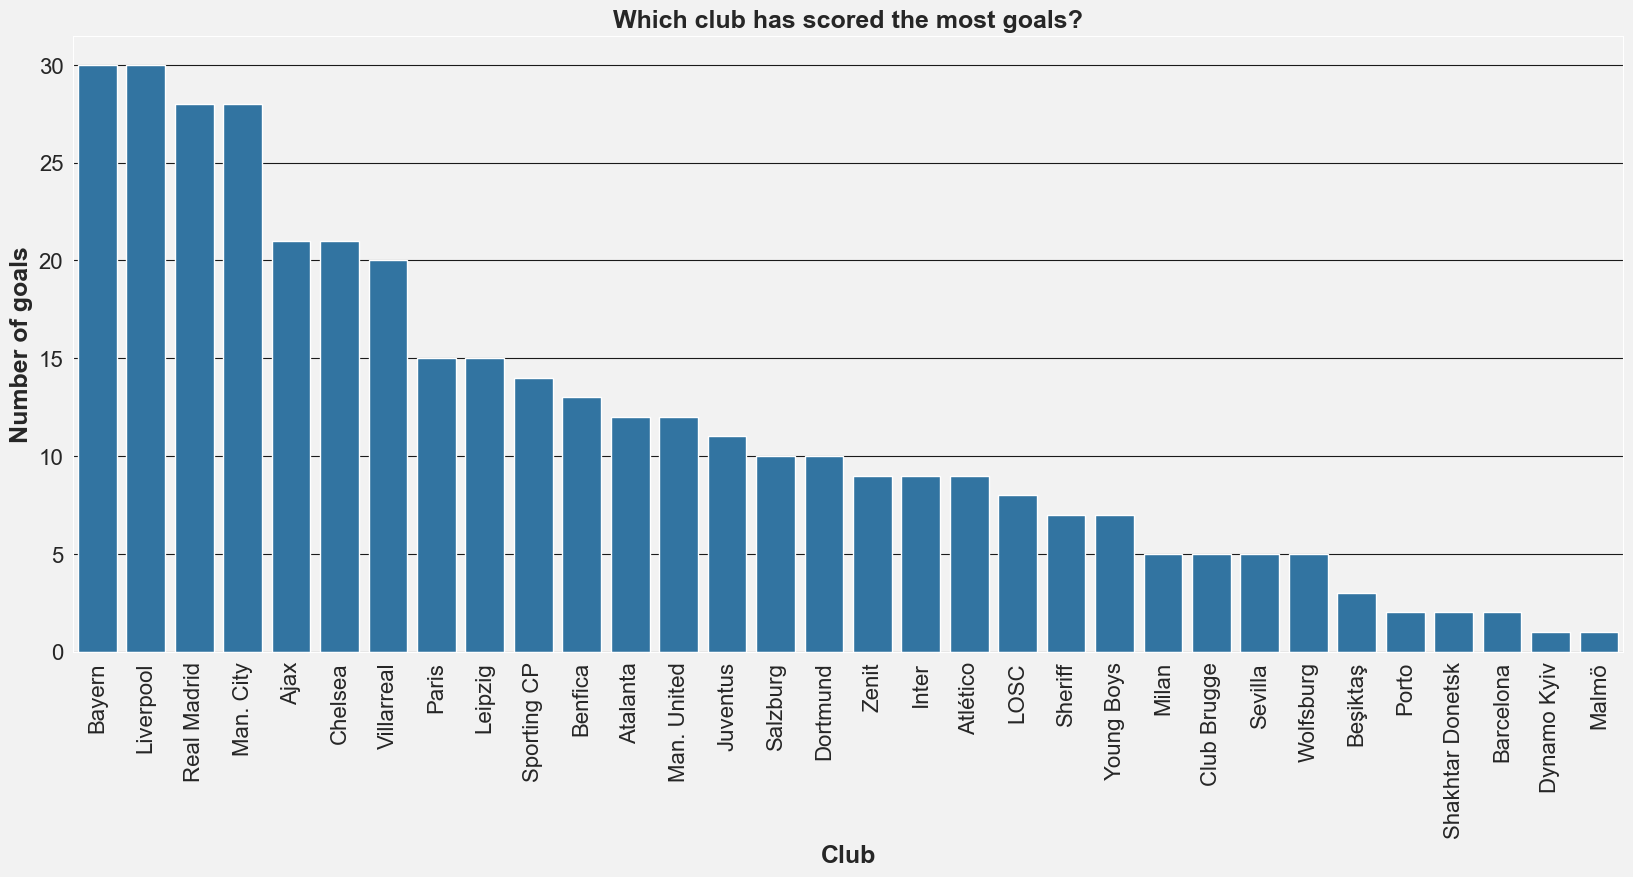

In [31]:
# Grouping the data
grouped_data = df_goals.groupby('club').sum()

# Sorting the values by goals scored in descending order
sorted_data = grouped_data['goals'].sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(20, 8))
plt.title('Which club has scored the most goals?', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
sns.barplot(x=sorted_data.index, y=sorted_data.values, order=sorted_data.index)
plt.xlabel('Club', fontsize=18, fontweight='bold')
plt.ylabel('Number of goals', fontsize=18, fontweight='bold')
plt.show()


In [32]:
# Split the "Result" column into separate columns
fixtures_df[['Home Goals', 'Away Goals']] = fixtures_df['Result'].str.split(' - ', expand=True)

# Convert the columns to numeric types
fixtures_df['Home Goals'] = pd.to_numeric(fixtures_df['Home Goals'])
fixtures_df['Away Goals'] = pd.to_numeric(fixtures_df['Away Goals'])

# Calculate total goals scored and conceded by each team
goals_scored = fixtures_df.groupby('Home Team')['Home Goals'].sum().add(fixtures_df.groupby('Away Team')['Away Goals'].sum(), fill_value=0)
goals_conceded = fixtures_df.groupby('Home Team')['Away Goals'].sum().add(fixtures_df.groupby('Away Team')['Home Goals'].sum(), fill_value=0)

# Calculate goal difference
goal_difference = goals_scored - goals_conceded

# Create a DataFrame or list with team names, goals scored, goals conceded, and goal difference
team_stats_df = pd.DataFrame({
    'Team': goals_scored.index,
    'Goals Scored': goals_scored.values,
    'Goals Conceded': goals_conceded.values,
    'Goal Difference': goal_difference.values
})

# Display the team stats
print(team_stats_df)


                Team  Goals Scored  Goals Conceded  Goal Difference
0               Ajax            22               8               14
1           Atalanta            12              13               -1
2           Atlético             9              10               -1
3          Barcelona             2               9               -7
4             Bayern            31               7               24
5            Benfica            14              17               -3
6           Besiktas             3              19              -16
7            Chelsea            21              10               11
8        Club Brugge             6              20              -14
9           Dortmund            10              11               -1
10       Dynamo Kyiv             1              11              -10
11             Inter             9               7                2
12          Juventus            11              10                1
13              LOSC             8              

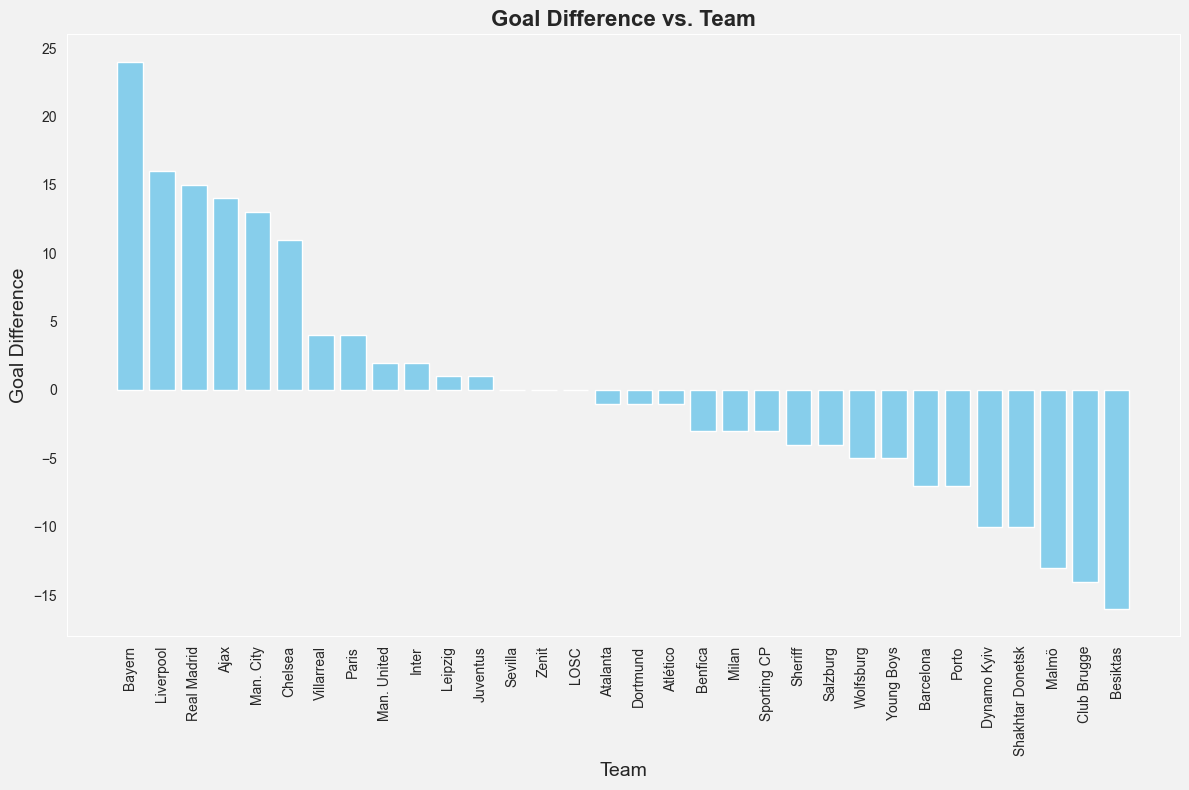

In [33]:
# Sort the DataFrame by goal difference in descending order
team_stats_df_sorted = team_stats_df.sort_values(by='Goal Difference', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(team_stats_df_sorted['Team'], team_stats_df_sorted['Goal Difference'], color='skyblue')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Goal Difference', fontsize=14)
plt.title('Goal Difference vs. Team', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.grid(False)

plt.show()

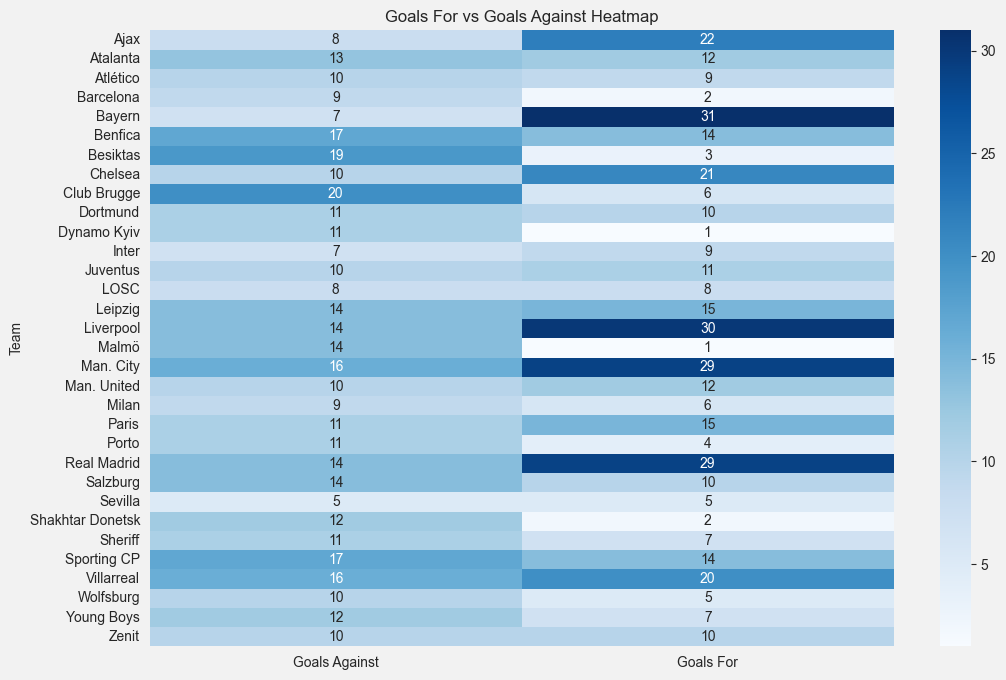

In [34]:
# Split the result column into home goals and away goals
fixtures_df[['Home Goals', 'Away Goals']] = fixtures_df['Result'].str.split(' - ', expand=True).astype(int)

# Create a DataFrame with team names, goals for, and goals against
team_stats_df = pd.DataFrame(columns=['Team', 'Goals For', 'Goals Against'])
team_stats_df['Team'] = pd.concat([fixtures_df['Home Team'], fixtures_df['Away Team']], ignore_index=True)
team_stats_df['Goals For'] = pd.concat([fixtures_df['Home Goals'], fixtures_df['Away Goals']], ignore_index=True)
team_stats_df['Goals Against'] = pd.concat([fixtures_df['Away Goals'], fixtures_df['Home Goals']], ignore_index=True)

# Create a pivot table with team names as rows, goals for and goals against as columns, and sum of goals as values
heatmap_data = team_stats_df.pivot_table(index='Team', values=['Goals Against', 'Goals For'], aggfunc='sum')

# Plot the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g')
plt.title('Goals For vs Goals Against Heatmap')

plt.ylabel('Team')
plt.show()


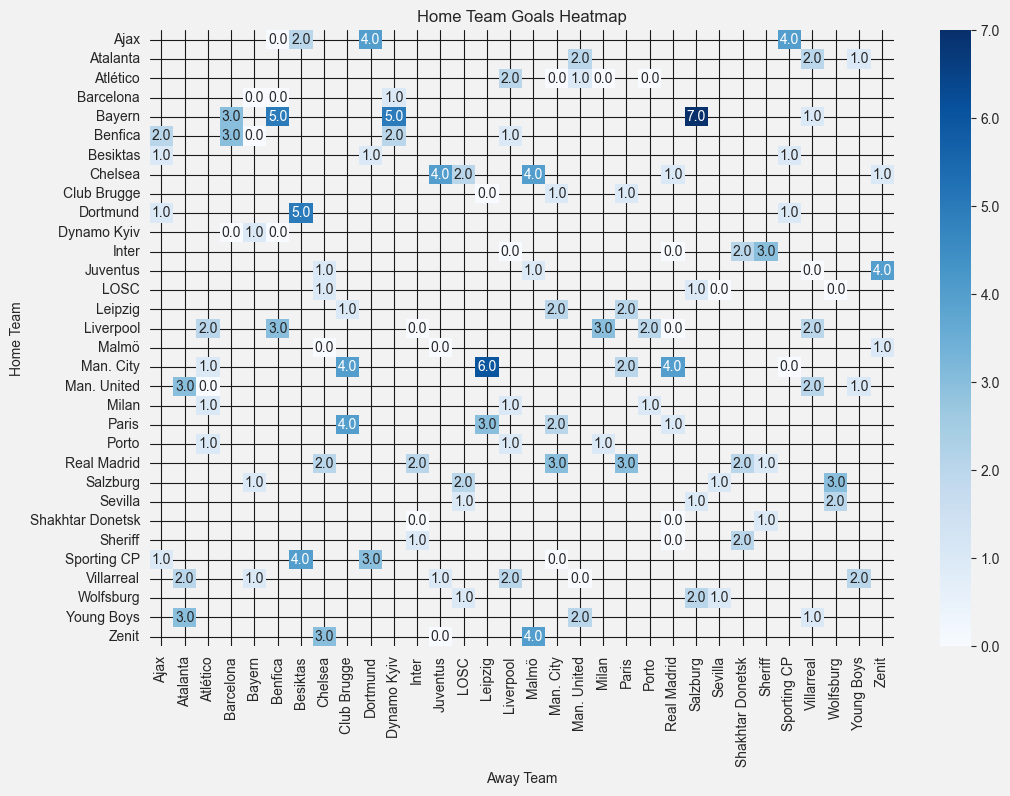

In [35]:
# Clean the 'Result' column to handle missing or invalid data
fixtures_df['Result'] = fixtures_df['Result'].fillna('0 - 0')  # Replace missing values with '0 - 0'
fixtures_df['Result'] = fixtures_df['Result'].str.replace(' ', '')  # Remove any spaces in the string

# Extract individual scores from the 'Result' column
fixtures_df[['Home Goals', 'Away Goals']] = fixtures_df['Result'].str.split('-', expand=True).astype(float)

# Create a pivot table with the home team as rows, away team as columns, and the result (score) as values
heatmap_data = fixtures_df.pivot_table(index='Home Team', columns='Away Team', values=['Home Goals', 'Away Goals'])

# Plot the pivot table as a heatmap with black background
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data['Home Goals'], cmap='Blues', annot=True, fmt='.1f', cbar_kws={'format': '%.1f'}, facecolor='black')
plt.title('Home Team Goals Heatmap')
plt.xlabel('Away Team')
plt.ylabel('Home Team')

plt.grid('gray')
plt.show()


